## Import Libraries

In [ ]:
"""
!pip install ydata-profiling
!pip install sweetviz
"""

'\n!pip install ydata-profiling\n!pip install sweetviz\n'

In [ ]:
"""
from ydata_profiling import ProfileReport
import sweetviz as sv
import plotly.express as px
#from google.colab import files
"""

'\nfrom ydata_profiling import ProfileReport\nimport sweetviz as sv\nimport plotly.express as px\n#from google.colab import files\n'

In [ ]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [7]:
FootBallPlayers = pd.read_csv("final_data.csv")

In [8]:
FootBallPlayers.shape

(10754, 22)

In [9]:
FootBallPlayers.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [ ]:
FootBallPlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [ ]:
FootBallPlayers.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [ ]:
FootBallPlayers.describe(exclude='number')

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


In [ ]:
"""
profile_FootBallPlayers = ProfileReport(FootBallPlayers, title="Profiling Report")
profile_FootBallPlayers.to_file("FootBallPlayers_report.html")
from google.colab import files
files.download('FootBallPlayers_report.html')
profile_FootBallPlayers
"""

'\nprofile_FootBallPlayers = ProfileReport(FootBallPlayers, title="Profiling Report")\nprofile_FootBallPlayers.to_file("FootBallPlayers_report.html")\nfrom google.colab import files\nfiles.download(\'FootBallPlayers_report.html\')\nprofile_FootBallPlayers\n'

In [ ]:
"""
vis_report_FootBallPlayers = sv.analyze(FootBallPlayers)
vis_report_FootBallPlayers.show_html("vis_report_FootBallPlayers.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"
from google.colab import files
files.download('vis_report_FootBallPlayers.html')
vis_report_FootBallPlayers.show_notebook()
"""

'\nvis_report_FootBallPlayers = sv.analyze(FootBallPlayers)\nvis_report_FootBallPlayers.show_html("vis_report_FootBallPlayers.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"\nfrom google.colab import files\nfiles.download(\'vis_report_FootBallPlayers.html\')\nvis_report_FootBallPlayers.show_notebook()\n'

In [ ]:
# uniqeness
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [10]:
# uniqeness
FootBallPlayers.drop_duplicates(inplace=True)
FootBallPlayers[FootBallPlayers.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [ ]:
# Completeness
FootBallPlayers.isnull().sum()

,0
player,0
team,0
name,0
position,0
height,0
age,0
appearance,0
goals,0
assists,0
yellow cards,0


In [ ]:
#Completeness
FootBallPlayers['name'].value_counts()

,count
name,
Paulinho,6
Vitinho,5
Guilherme,5
Fernando,4
João Pedro,4
...,...
Everson,1
Matheus Mendes,1
Gabriel Delfim,1


In [ ]:
FootBallPlayers[FootBallPlayers['name'] =='Paulinho']

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3259,/paulinho/profil/spieler/1083888,Clube de Regatas Vasco da Gama,Paulinho,Defender Right-Back,172.0,18.0,0,0.000000,0.000000,0.000000,...,0.0,0.0,0,0,0,0,500000,500000,2,1
3628,/paulinho/profil/spieler/428791,Clube Atlético Mineiro,Paulinho,Attack-LeftWinger,177.0,22.0,47,0.287540,0.107827,0.071885,...,0.0,0.0,2504,458,55,2,7500000,25000000,4,1
3786,/paulinho/profil/spieler/57229,Sport Club Corinthians Paulista,Paulinho,midfield-CentralMidfield,183.0,34.0,8,0.450000,0.000000,0.225000,...,0.0,0.0,400,276,57,15,1200000,40000000,3,0
4016,/paulinho/profil/spieler/85771,CS Marítimo,Paulinho,Defender Right-Back,176.0,31.0,49,0.047468,0.071203,0.213608,...,0.0,0.0,3792,21,2,1,300000,1500000,2,1
4276,/paulinho/profil/spieler/211072,Sporting CP,Paulinho,Attack Centre-Forward,187.0,30.0,84,0.431334,0.297471,0.267724,...,0.0,0.0,6051,199,36,7,8000000,15000000,4,0
9139,/paulinho/profil/spieler/534473,Al-Fayha FC,Paulinho,midfield-CentralMidfield,175.0,26.0,60,0.147996,0.092497,0.277492,...,0.0,0.0,4865,0,0,0,1000000,1600000,3,0


In [ ]:
# Accurecy - types
FootBallPlayers.dtypes

,0
player,object
team,object
name,object
position,object
height,float64
age,float64
appearance,int64
goals,float64
assists,float64
yellow cards,float64


In [11]:
# Accurecy - Outlier
all_features = FootBallPlayers.columns.tolist()
categorical_features = ['player','name', 'team', 'position']
numerical_features = [feature for feature in all_features if feature not in categorical_features]


#numeric_features = ['height', 'age', 'appearance', 'goals','assists','goals conceded','minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded']


In [12]:
len(numerical_features), len(categorical_features), len(all_features)

(18, 4, 22)

In [13]:
df=FootBallPlayers.copy()

In [ ]:
df.shape

(10754, 22)

In [ ]:
df=df[df['current_value']<=100000000]
df=df[df['current_value']>0]

In [ ]:
df=df[df['goals']<=1]


In [ ]:
df=df[df['assists']<=0.8]

In [ ]:
df=df[df['days_injured']<=1200]

In [ ]:
df=df[df['award']<=50]

In [ ]:
df=df[df['goals conceded']<=5]

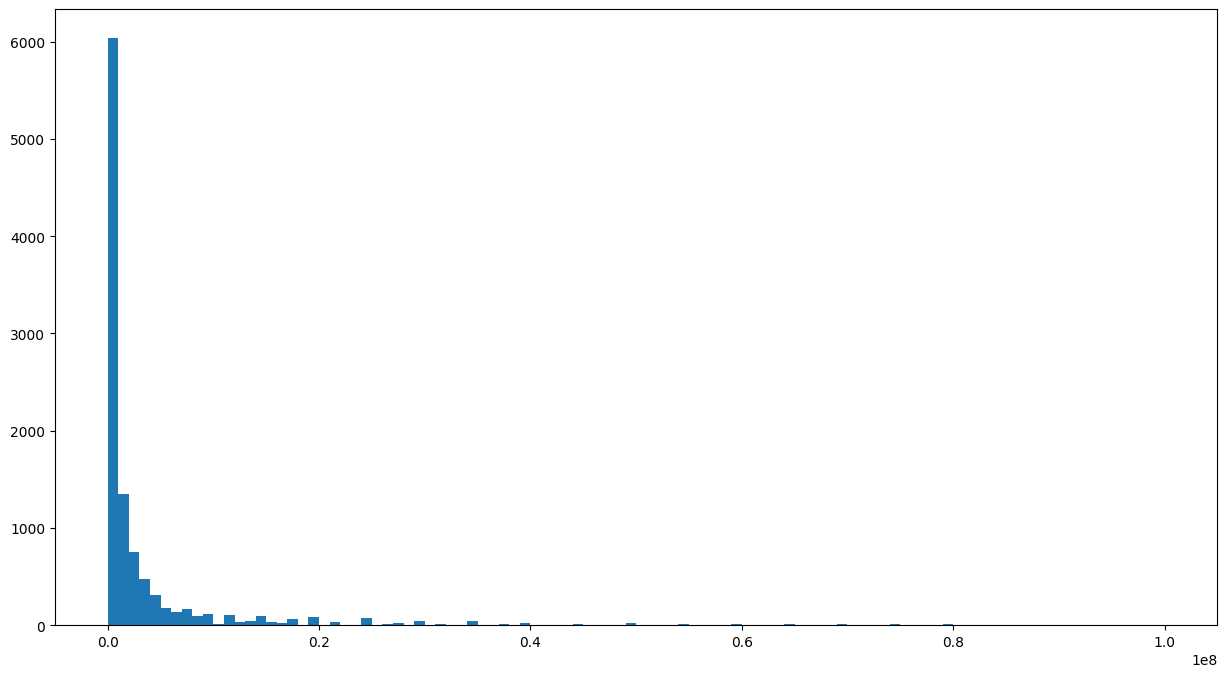

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df['current_value'], bins=100);


In [14]:
df.shape

(10754, 22)

#### 3. Feature selection

In [ ]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [ ]:
df = df[['position_encoded', 'appearance', 'highest_value']]

In [ ]:
df.head(2)

,position_encoded,appearance,highest_value
0,1,104,70000000
1,1,15,22000000


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [15]:

categorical_features.remove('name')  # Remove 'name' first
categorical_features.remove('player') # Then remove 'player'

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def featureencoder(df, categorical_features):
    """
    Encodes categorical features using Label Encoding.

    Args:
        df (pd.DataFrame): The DataFrame containing the features.
        categorical_features (list): A list of categorical feature names.

    Returns:
        pd.DataFrame: The DataFrame with encoded categorical features.
    """
    for feature in categorical_features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

In [17]:
df=df[numerical_features+categorical_features]

In [18]:
df=featureencoder(df, categorical_features)

In [ ]:
df=pd.get_dummies(df[categorical_features])

In [19]:
df.shape

(10754, 20)

In [21]:
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,team,position
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0,226,9
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0,226,9
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0,226,9
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0,226,6
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0,226,6


In [22]:
df.shape

(10754, 20)

In [ ]:
# one hot coding
#df = pd.get_dummies(df, columns=categorical_features)

#### 4. Prepare train and test data

In [23]:
# Prepare data
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X.shape

(10754, 20)

## Buliding the Model

In [25]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 2

In [27]:
# Import the necessary class from sklearn.neighbors
from sklearn.neighbors import NearestNeighbors


# Instantiate the NearestNeighbors class
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)

In [28]:
distances[:,min_samples-1]

array([3.46668586, 1.72281624, 2.32899878, ..., 0.94259794, 1.42638692,
       1.11065737])

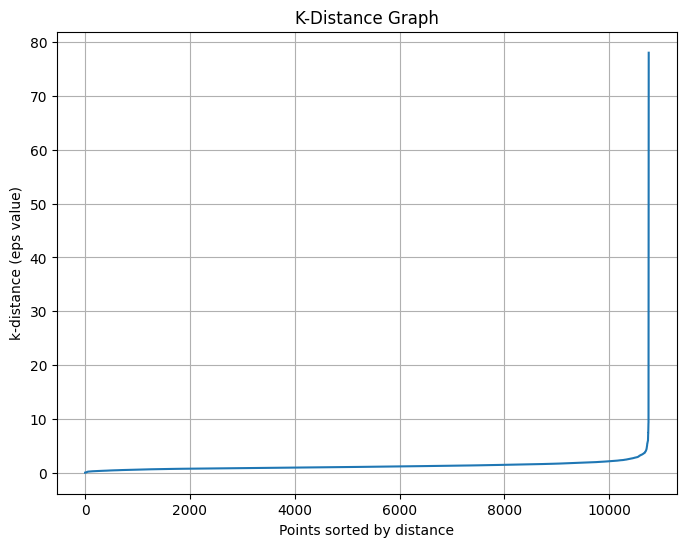

In [29]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [31]:
# Import the necessary class from sklearn.cluster
from sklearn.cluster import DBSCAN

# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 5  # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

## Train and test the Model

In [32]:
# Fit the model on the training data

clusters = dbscan.fit_predict(X_scaled)

In [33]:
pd.Series(clusters).value_counts()

,count
0,10703
-1,34
6,4
3,3
1,2
2,2
4,2
5,2
7,2


## Evaluating the Model

In [36]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, clusters)  # silhouette_score is now imported and available
silhouette_avg  # Print the silhouette score

-0.6492775186190373

In [35]:
X.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,team,position
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0,226,9
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0,226,9
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0,226,9
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0,226,6
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0,226,6


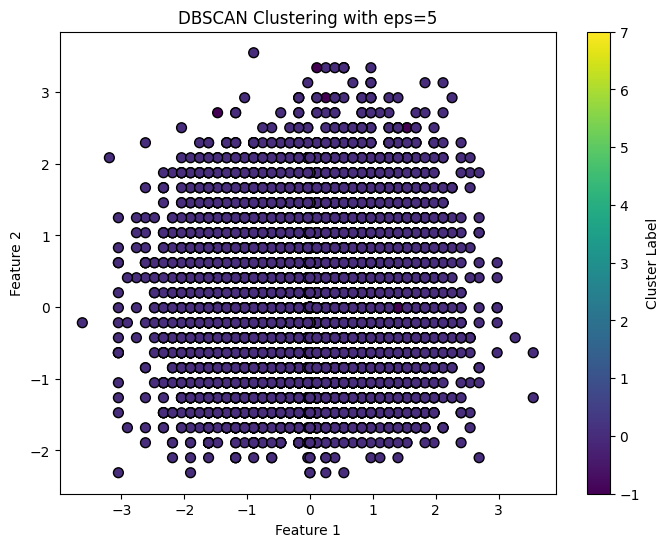

In [37]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [38]:
X['dbscan'] = clusters

In [ ]:
X.head()

,position_encoded,appearance,highest_value,kmeans
0,1,104,70000000,1
1,1,15,22000000,0
2,1,4,6000000,0
3,2,82,50000000,1
4,2,63,80000000,1


In [39]:
X['dbscan'].value_counts()

,count
dbscan,
0,10703
-1,34
6,4
3,3
1,2
2,2
4,2
5,2
7,2


<Axes: xlabel='position_encoded', ylabel='highest_value'>

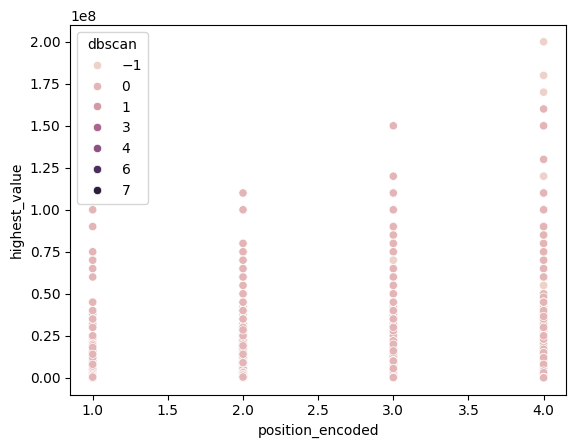

In [41]:
sns.scatterplot(data = X , x = 'position_encoded', y = 'highest_value', hue = 'dbscan')

<Axes: xlabel='highest_value', ylabel='appearance'>

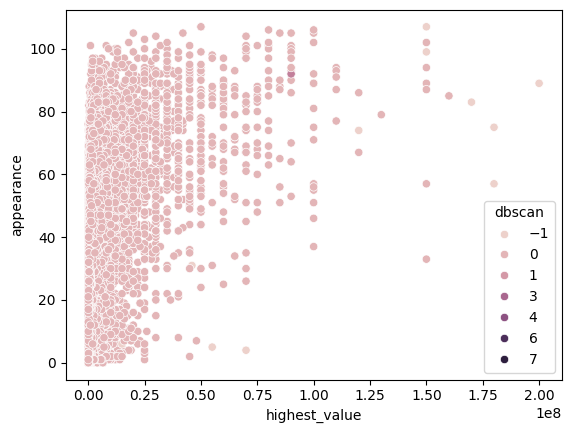

In [42]:
sns.scatterplot(data = X , x = 'highest_value', y = 'appearance', hue = 'dbscan')

<Axes: xlabel='appearance', ylabel='position_encoded'>

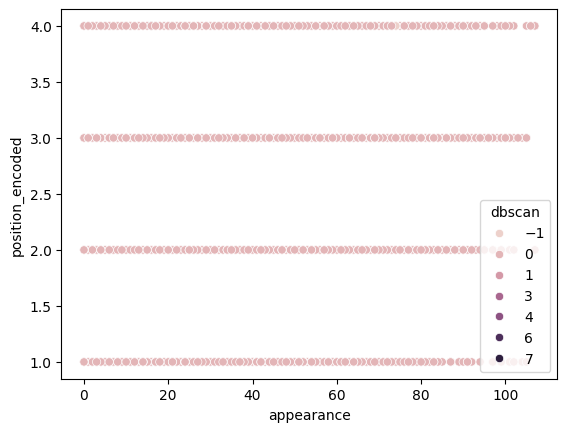

In [43]:
sns.scatterplot(data = X , x = 'appearance', y = 'position_encoded', hue = 'dbscan')

In [44]:

import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='highest_value', y='position_encoded', z='appearance',
              color='dbscan')
fig.show()